In [ ]:
!pip install fastai

In [ ]:
!pip install -Uqq fastbook

### Imports

In [ ]:
from fastai.vision.core import *
from fastai.vision.data import *
from fastbook import *
import fastbook

fastbook.setup_book()

### Criando o datablock

In [ ]:
datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

### ***Sem pré processamento***

In [ ]:
datablock = datablock.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
path = "gdrive/My Drive/hagrid/subsample"
dls = datablock.dataloaders(path)

### Show batch

In [ ]:
learn = vision_learner(dls, resnet18,  loss_func = CrossEntropyLossFlat(), metrics=[error_rate, accuracy])
learn.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,4.383137,3.523160,0.925000,0.075000,04:55


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.977504,3.391045,0.911111,0.088889,01:43
1,3.858199,3.410190,0.900000,0.100000,01:40
2,3.674822,3.321161,0.894444,0.105556,01:41
3,3.503672,3.235629,0.888889,0.111111,01:39
4,3.371176,3.225600,0.877778,0.122222,01:42


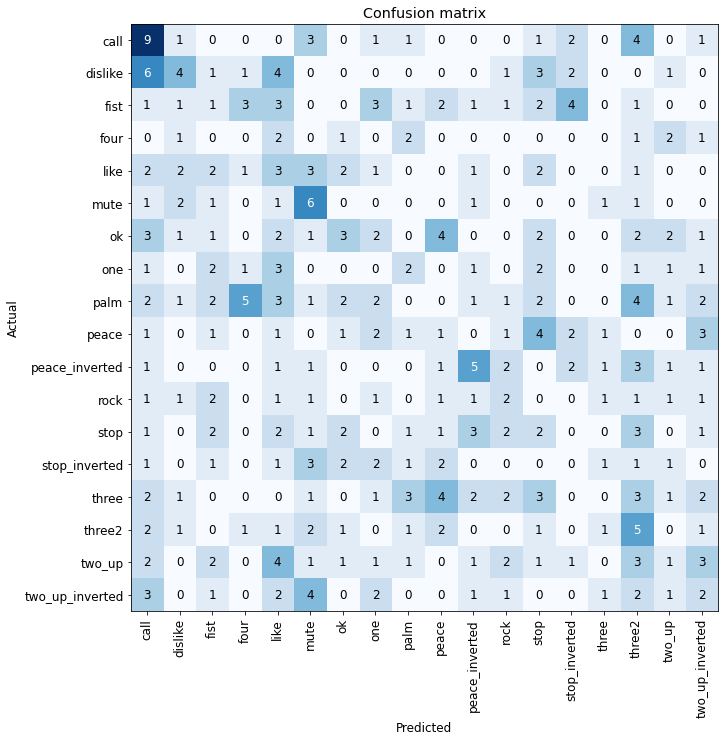

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,15))

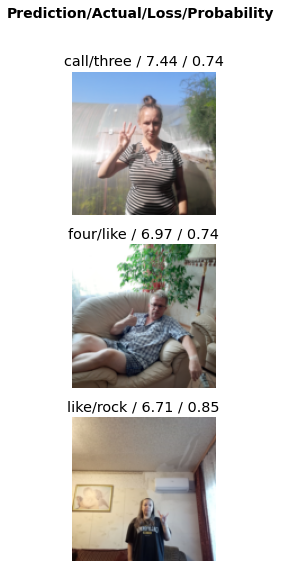

In [ ]:
interp.plot_top_losses(3, nrows=3)

### ***Com pré processamento***

In [ ]:
datablock = datablock.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
path = "gdrive/My Drive/hagrid/cropped"
dls = datablock.dataloaders(path)

### Show batch

In [ ]:
learn = vision_learner(dls, resnet18, loss_func = CrossEntropyLossFlat(), metrics=[error_rate, accuracy])
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,4.035522,2.284985,0.708333,0.291667,03:06


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.916791,1.768589,0.572222,0.427778,00:11
1,2.470511,1.234797,0.361111,0.638889,00:09
2,1.957953,0.961234,0.313889,0.686111,00:09
3,1.610711,0.806930,0.261111,0.738889,00:09
4,1.379918,0.780863,0.247222,0.752778,00:09


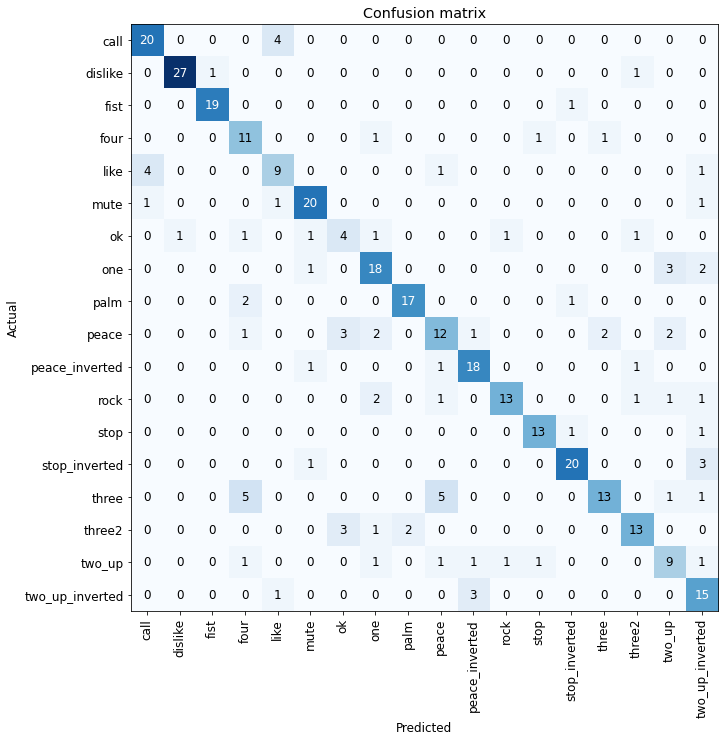

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,15))

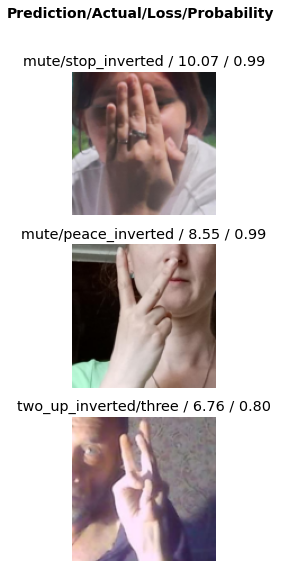

In [ ]:
interp.plot_top_losses(3, nrows=3)

### ***Usando resnet152***

In [ ]:
learn = vision_learner(dls, resnet152, loss_func = CrossEntropyLossFlat(), metrics=[error_rate, accuracy])
learn.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.499940,1.947001,0.538889,0.461111,02:42


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.928382,0.970448,0.291667,0.708333,00:17
1,1.408156,0.593195,0.177778,0.822222,00:17
2,0.989305,0.429106,0.108333,0.891667,00:17
3,0.724258,0.345082,0.100000,0.900000,00:17
4,0.553931,0.321056,0.091667,0.908333,00:17


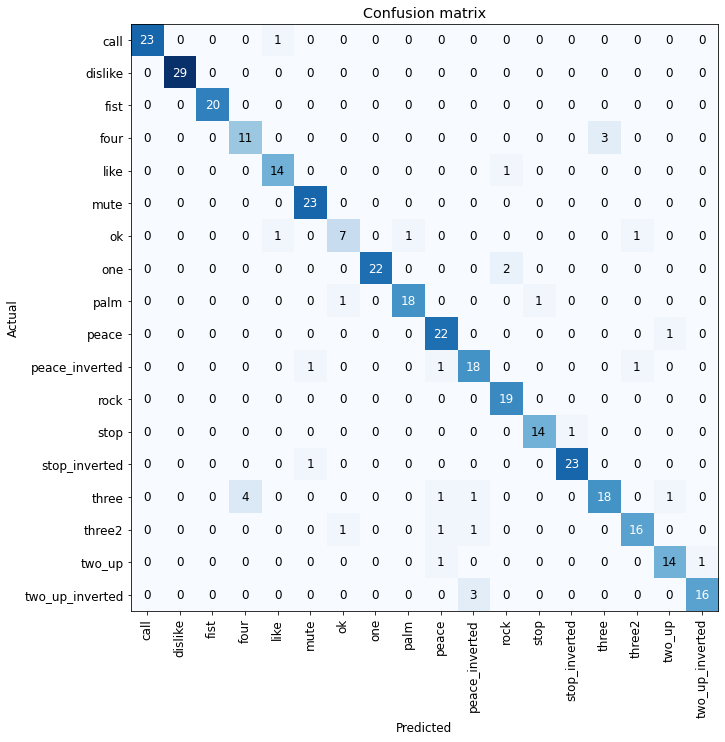

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,15))

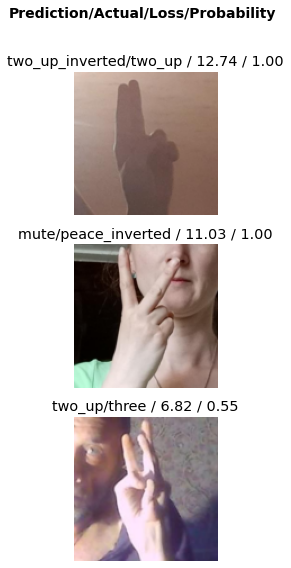

In [ ]:
interp.plot_top_losses(3, nrows=3)

### ***Classificação de um gesto***

In [ ]:
#hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
gesture = PILImage.create(uploader.data[0])
gesture

In [ ]:
resultado,_,probs = learn.predict(gesture)
print(resultado)